In [4]:
import numpy as np
import polars as pl
import bambi as bm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from itertools import combinations 
import plotnine as p
import pandas as pd

## OLS

In [5]:
# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)


In [12]:
np.random.seed(1)

tb = pd.DataFrame({
    'x': np.random.normal(size=10000),
    'u': np.random.normal(size=10000)})
tb['y'] = 5.5*tb['x'].values + 12*tb['u'].values


reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

reg_tb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2237.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:14:17   Log-Likelihood:                -39049.
No. Observations:               10000   AIC:                         7.810e+04
Df Residuals:                    9998   BIC:                         7.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1114      0.120      0.927      0.354      -0.124       0.347
x              5.6887      0.120     47.293      0.000       5.453       5.924
==============================================================================
Omnibus:                        0.640   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.672
Skew:                          -0.012   Prob(JB):                        0.715
Kurtosis:                       2.968   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:

tb['yhat1'] = reg_tb.predict(tb)
tb['yhat2'] = 0.1114 + 5.6887*tb['x']
tb['uhat1'] = reg_tb.resid
tb['uhat2'] = tb['y'] - tb['yhat2']

tb.describe()


,x,u,y,yhat1,yhat2,uhat1,uhat2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,0.009773,0.009435,0.166975,0.166975,0.166994,-1.691092e-16,-0.000019
std,0.998836,1.001239,13.289365,5.682040,5.682077,1.201339e+01,12.013394
min,-3.656440,-3.451403,-50.654682,-20.688875,-20.688991,-4.142425e+01,-41.424248
25%,-0.662925,-0.672294,-8.827691,-3.659775,-3.659781,-8.199882e+00,-8.199908
50%,0.008454,0.018803,0.242724,0.159473,0.159493,4.497835e-02,0.044993
75%,0.671809,0.688683,9.232769,3.933075,3.933119,8.147307e+00,8.147305
max,4.026849,4.168118,48.162716,23.018769,23.018936,5.000751e+01,50.007515


In [27]:
reg_tb.params

Intercept    0.111381
x            5.688663
dtype: float64

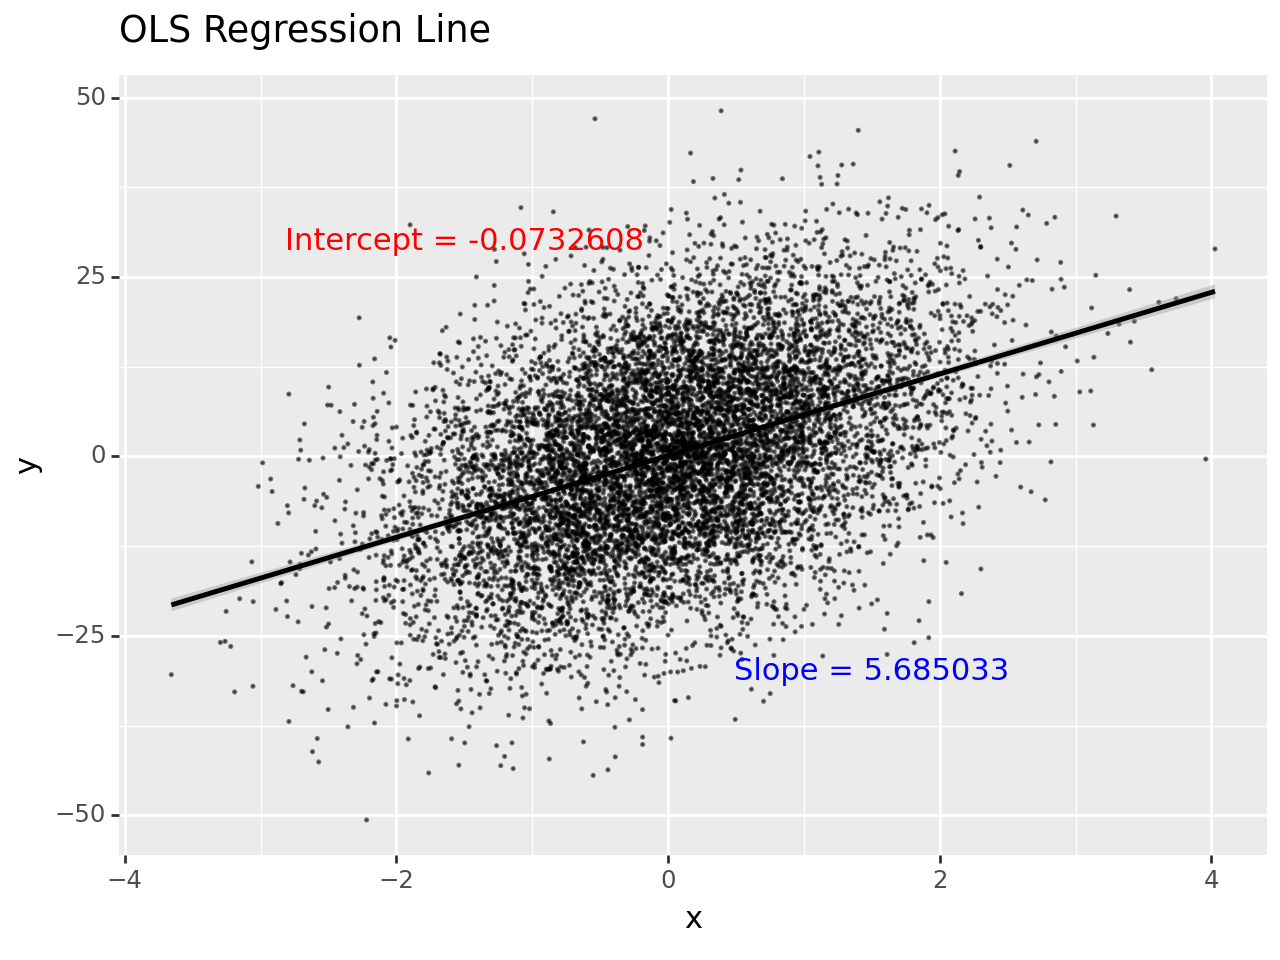

<Figure Size: (640 x 480)>

In [32]:
p.ggplot(tb, p.aes(x='x', y='y')) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.05, color = "black", alpha = 0.5) +\
    p.geom_smooth(p.aes(x='x', y='y'), method = "lm", color = "black") +\
    p.annotate("text", x = -1.5, y = 30, color = "red", 
             label = "Intercept = {}".format(-0.0732608)) +\
    p.annotate("text", x = 1.5, y = -30, color = "blue", 
             label = "Slope = {}".format(5.685033))

### Residual plot

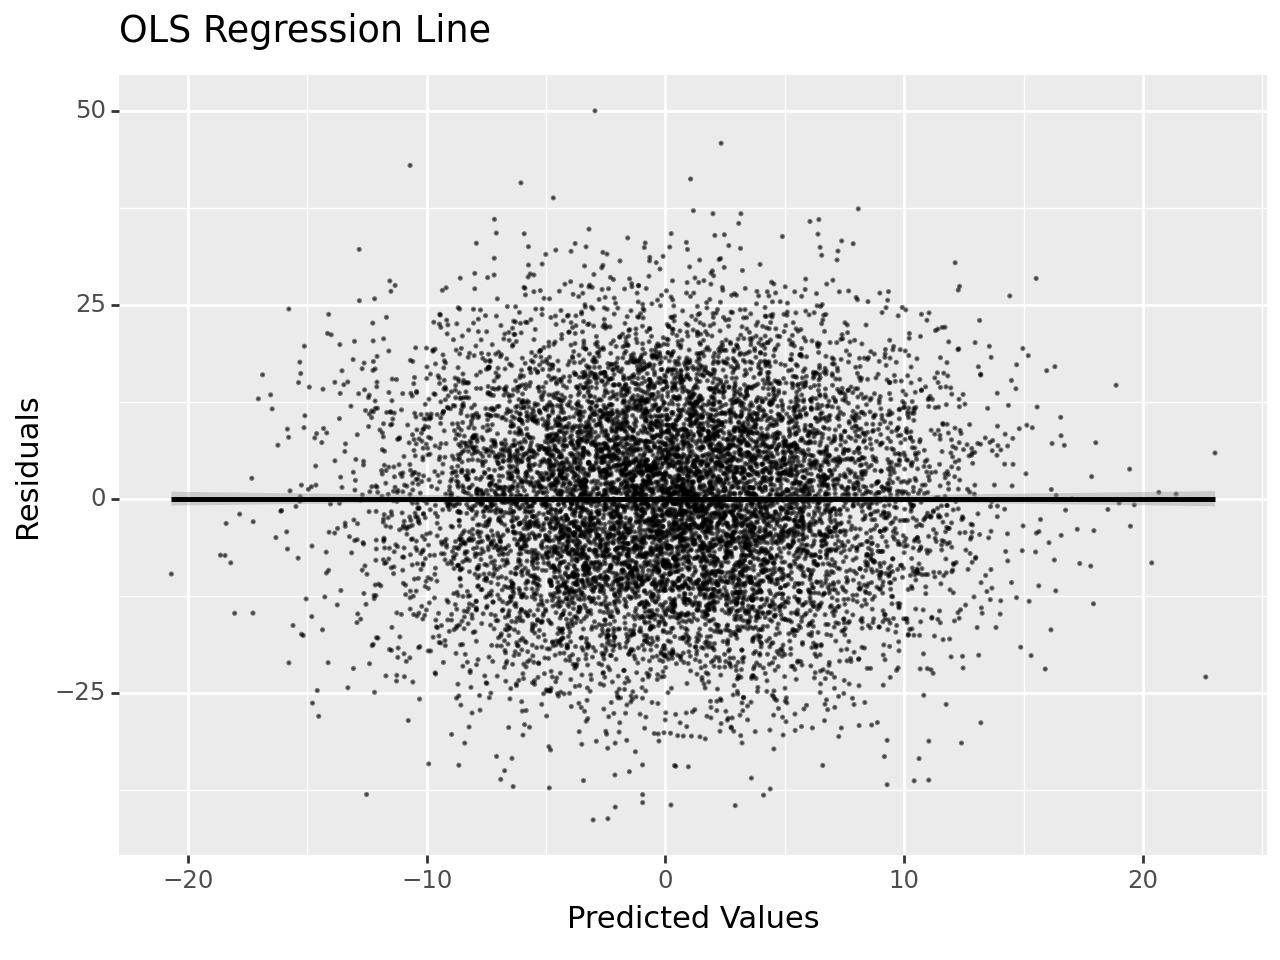

<Figure Size: (640 x 480)>

In [38]:
p.ggplot(tb, p.aes(x='yhat1', y='uhat1')) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.05, color = "black", alpha = 0.5) +\
    p.geom_smooth(p.aes(x='yhat1', y='uhat1'), method = "lm", color = "black") +\
    p.xlab("Predicted Values") +\
    p.ylab("Residuals")
    
    # p.annotate("text", x = -1.5, y = 30, color = "red", 
    #          label = "Intercept = {}".format(-0.0732608)) +\
    # p.annotate("text", x = 1.5, y = -30, color = "blue", 
    #          label = "Slope = {}".format(5.685033))

### 2.14 Algebraic Properties of OLS

In [53]:
tb = pd.DataFrame({
    'x': 9*np.random.normal(size=10),
    'u': 36*np.random.normal(size=10)})
tb['y'] = 3*tb['x'].values + 2*tb['u'].values

reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

tb['yhat1'] = reg_tb.predict(tb)
tb['uhat1'] = reg_tb.resid
tb['x_uhat1'] = tb['x']*tb['uhat1']
tb['yhat1_uhat1'] = tb['yhat1']*tb['uhat1']

tb.describe()

,x,u,y,yhat1,uhat1,x_uhat1,yhat1_uhat1
count,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01
mean,-1.804838,-0.672698,-6.759910,-6.759910,-2.131628e-15,-6.252776e-14,8.526513e-14
std,10.377592,33.183799,49.992102,15.035570,4.767748e+01,3.857693e+02,3.588010e+02
min,-18.103496,-61.248978,-94.451704,-41.113343,-1.002563e+02,-3.431931e+02,-5.819438e+02
25%,-6.114145,-20.320639,-36.175529,-11.402547,-2.066923e+01,-1.480982e+02,-2.745119e+02
50%,-2.558165,3.253808,-6.228944,-5.668452,-7.906258e+00,-8.102953e+01,1.669872e+01
75%,1.399523,27.710512,38.900147,-0.516372,4.313043e+01,-6.922260e+00,2.269036e+02
max,21.905995,35.509497,47.601035,16.854395,5.283686e+01,1.050372e+03,6.441074e+02


In [64]:
reg_tb.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.7956
Date:                Thu, 21 Dec 2023   Prob (F-statistic):              0.398
Time:                        02:53:51   Log-Likelihood:                -52.307
No. Observations:                  10   AIC:                             108.6
Df Residuals:                       8   BIC:                             109.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3748     16.258     -0.577      0.580     -46.866      28.116
x             -1.4488      1.624     -0.892      0.398      -5.195       2.297
==============================================================================
Omnibus:                        2.076   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                0.796
Skew:                          -0.690   Prob(JB):                        0.672
Kurtosis:                       2.916   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Error Decomposition

In [65]:
SST = np.sum((tb['y'] - np.mean(tb['y']))**2)
SSR = np.sum((tb['y'] - tb['yhat1'])**2)
SSE = np.sum((tb['yhat1'] - np.mean(tb['y']))**2)

np.round(SST, 2) == np.round(SSR + SSE, 2)
R_squared = SSE/SST

print("SST: {}".format(SST))
print("SSR: {}".format(SSR))
print("SSE: {}".format(SSE))
print("R-squared: {}".format(R_squared))


SST: 22492.8927599118
SSR: 20458.277358935487
SSE: 2034.6154009763143
R-squared: 0.09045592413095613


### Expected Value of OLS

Mean of beta estimates: 2.000616976024828


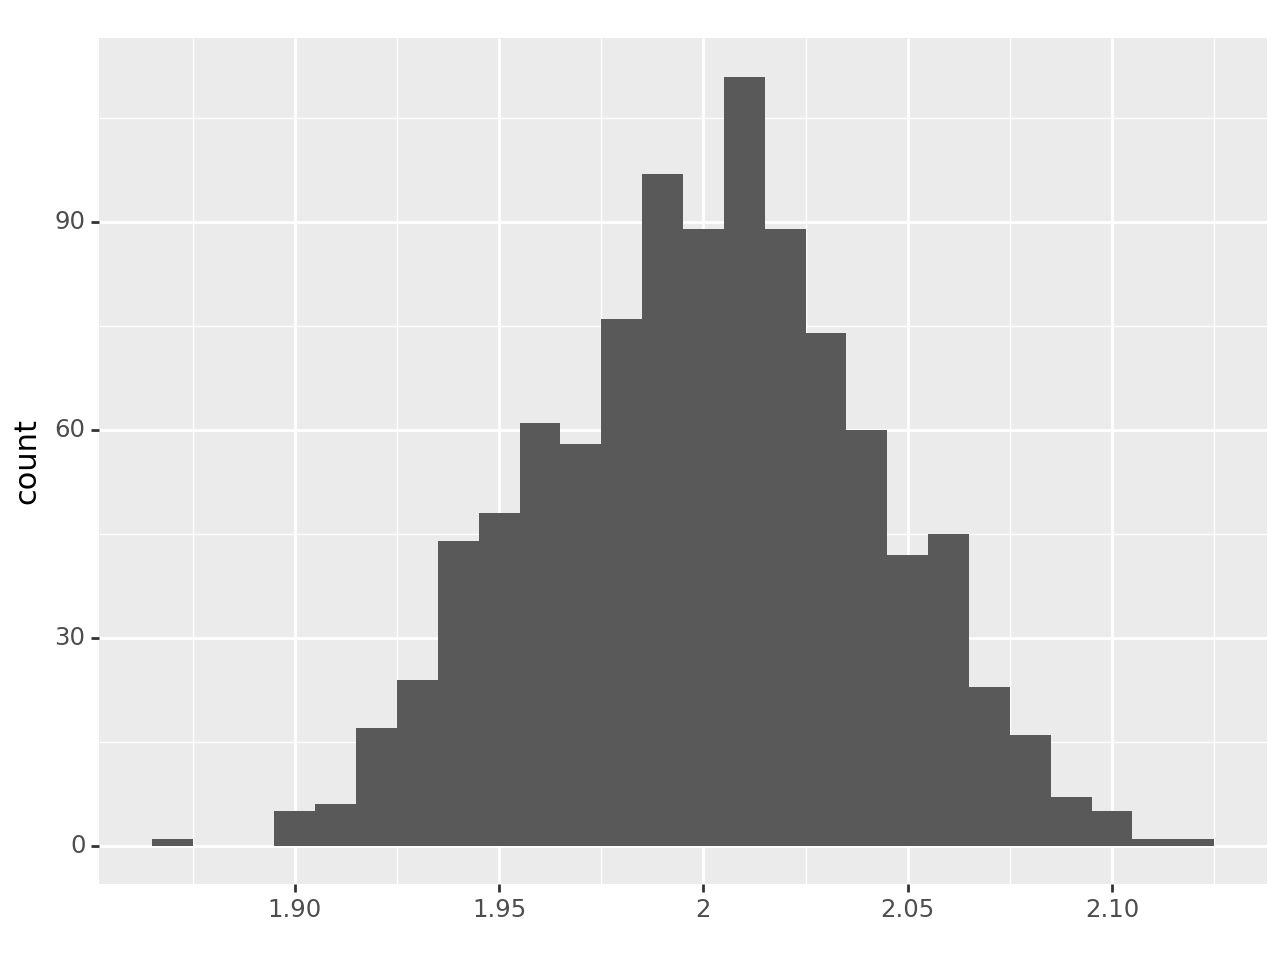

<Figure Size: (640 x 480)>

In [72]:
beta_estimate = []
for i in range(1000):
    tb = pd.DataFrame({
    'x': 9*np.random.normal(size=10000),
    'u': 36*np.random.normal(size=10000)})
    tb['y'] = 3 + 2*tb['x'].values + tb['u'].values
    reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()
    beta_estimate.append(reg_tb.params['x'])

print("Mean of beta estimates: {}".format(np.mean(beta_estimate)))
p.ggplot() +\
  p.geom_histogram(p.aes(x=beta_estimate), binwidth = 0.01)